<a href="https://colab.research.google.com/github/sunithaparimi/Textual-Entailment/blob/main/textual_entailment_(IITIsoc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import warnings
warnings.filterwarnings('ignore')

In [234]:
import tensorflow as tf
from tensorflow import keras


# New section

In [235]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
import os

# List files in the root of Google Drive
root_drive_path = '/content/drive/My Drive'
for root, dirs, files in os.walk(root_drive_path):
    for file in files:
        print(os.path.join(root, file))


/content/drive/My Drive/aadhar of family .pdf
/content/drive/My Drive/UG Faculty advisor and student mentors list 2023.pdf
/content/drive/My Drive/time table IIT Indore.pdf
/content/drive/My Drive/batch a.pdf
/content/drive/My Drive/batch b.pdf
/content/drive/My Drive/mess food.pdf
/content/drive/My Drive/quantum mechanics d.j.griffiths.pdf
/content/drive/My Drive/Untitled form.gform
/content/drive/My Drive/11.code-workspace
/content/drive/My Drive/boarding pass.pdf
/content/drive/My Drive/P SUNITHA BZA to INDB.pdf
/content/drive/My Drive/DocScanner 28-Oct-2023 10-41 pm.pdf
/content/drive/My Drive/PSUINITHA RJY to BZA.pdf
/content/drive/My Drive/1 - Made with Clipchamp_1701168928367.mp4
/content/drive/My Drive/Google Keep Document (1).gdoc
/content/drive/My Drive/Google Keep Document.gdoc
/content/drive/My Drive/1234.jpg
/content/drive/My Drive/1233.jpg
/content/drive/My Drive/DOC-20240124-WA0003._copy.pdf
/content/drive/My Drive/Untitled document.gdoc
/content/drive/My Drive/Web devel

In [237]:
import zipfile
import os

# Use the correct path and file name found in the previous step
zip_path ='/content/drive/My Drive/snli_1.0.zip'
extract_path = '/content/drive/My Drive/snli_1.0_extracted'

# Create a directory to extract the contents
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [238]:
import os

extract_path = '/content/drive/My Drive/snli_1.0_extracted'

# List files in the extraction directory
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


/content/drive/My Drive/snli_1.0_extracted/snli_1.0/.DS_Store
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/Icon
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/README.txt
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_dev.jsonl
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_dev.txt
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_test.jsonl
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_test.txt
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_train.jsonl
/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_train.txt
/content/drive/My Drive/snli_1.0_extracted/__MACOSX/._snli_1.0
/content/drive/My Drive/snli_1.0_extracted/__MACOSX/snli_1.0/._.DS_Store
/content/drive/My Drive/snli_1.0_extracted/__MACOSX/snli_1.0/._Icon
/content/drive/My Drive/snli_1.0_extracted/__MACOSX/snli_1.0/._README.txt


In [239]:
import json

# Define the path to the extracted JSONL file
jsonl_path_train = os.path.join(extract_path, '/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_train.jsonl')

# Read the JSONL file
with open(jsonl_path_train, 'r') as f:
    df_train = pd.read_json(jsonl_path_train,lines=True)

# Verify the data
print(df_train[:1])  # Print the first entry to verify


  annotator_labels         captionID gold_label               pairID  \
0        [neutral]  3416050480.jpg#4    neutral  3416050480.jpg#4r1n   

                                           sentence1  \
0  A person on a horse jumps over a broken down a...   

                              sentence1_binary_parse  \
0  ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   

                                     sentence1_parse  \
0  (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   

                                           sentence2  \
0  A person is training his horse for a competition.   

                              sentence2_binary_parse  \
0  ( ( A person ) ( ( is ( ( training ( his horse...   

                                     sentence2_parse  
0  (ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...  


In [240]:
from IPython.display import display

# Display the DataFrame
display(df_train.head())


annotator_labels         captionID     gold_label               pairID  \
0        [neutral]  3416050480.jpg#4        neutral  3416050480.jpg#4r1n   
1  [contradiction]  3416050480.jpg#4  contradiction  3416050480.jpg#4r1c   
2     [entailment]  3416050480.jpg#4     entailment  3416050480.jpg#4r1e   
3        [neutral]  2267923837.jpg#2        neutral  2267923837.jpg#2r1n   
4     [entailment]  2267923837.jpg#2     entailment  2267923837.jpg#2r1e   

                                           sentence1  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2  A person on a horse jumps over a broken down a...   
3              Children smiling and waving at camera   
4              Children smiling and waving at camera   

                              sentence1_binary_parse  \
0  ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
1  ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
2  ( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...   
3  ( Children ( ( ( smiling and ) waving ) ( at c...   
4  ( Children ( ( ( smiling and ) waving ) ( at c...   

                                     sentence1_parse  \
0  (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
1  (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
2  (ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...   
3  (ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...   
4  (ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...   

                                           sentence2  \
0  A person is training his horse for a competition.   
1      A person is at a diner, ordering an omelette.   
2                  A person is outdoors, on a horse.   
3                  They are smiling at their parents   
4                         There are children present   

                              sentence2_binary_parse  \
0  ( ( A person ) ( ( is ( ( training ( his horse...   
1  ( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...   
2  ( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...   
3  ( They ( are ( smiling ( at ( their parents ) ...   
4             ( There ( ( are children ) present ) )   

                                     sentence2_parse  
0  (ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...  
1  (ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...  
2  (ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...  
3  (ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...  
4  (ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...

In [241]:
df_train.shape

(550152, 10)

In [242]:
import json

# Define the path to the extracted JSONL file
jsonl_path_valid = os.path.join(extract_path, '/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_dev.jsonl')

# Read the JSONL file
with open(jsonl_path_valid, 'r') as f:
    df_valid = pd.read_json(jsonl_path_valid,lines=True)

# Verify the data
print(df_valid[:1])  # Print the first entry to verify


                                   annotator_labels         captionID  \
0  [neutral, entailment, neutral, neutral, neutral]  4705552913.jpg#2   

  gold_label               pairID  \
0    neutral  4705552913.jpg#2r1n   

                                           sentence1  \
0  Two women are embracing while holding to go pa...   

                              sentence1_binary_parse  \
0  ( ( Two women ) ( ( are ( embracing ( while ( ...   

                                     sentence1_parse  \
0  (ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...   

                                           sentence2  \
0  The sisters are hugging goodbye while holding ...   

                              sentence2_binary_parse  \
0  ( ( The sisters ) ( ( are ( ( hugging goodbye ...   

                                     sentence2_parse  
0  (ROOT (S (NP (DT The) (NNS sisters)) (VP (VBP ...  


In [243]:
df_valid

annotator_labels         captionID  \
0      [neutral, entailment, neutral, neutral, neutral]  4705552913.jpg#2   
1     [entailment, entailment, entailment, entailmen...  4705552913.jpg#2   
2     [contradiction, contradiction, contradiction, ...  4705552913.jpg#2   
3     [entailment, entailment, entailment, entailmen...  2407214681.jpg#0   
4     [neutral, neutral, neutral, entailment, entail...  2407214681.jpg#0   
...                                                 ...               ...   
9995  [neutral, contradiction, entailment, contradic...    77063034.jpg#3   
9996  [contradiction, contradiction, contradiction, ...    77063034.jpg#3   
9997  [entailment, entailment, entailment, entailmen...  4805835848.jpg#0   
9998  [contradiction, contradiction, entailment, con...  4805835848.jpg#0   
9999  [neutral, contradiction, neutral, neutral, ent...  4805835848.jpg#0   

         gold_label               pairID  \
0           neutral  4705552913.jpg#2r1n   
1        entailment  4705552913.jpg#2r1e   
2     contradiction  4705552913.jpg#2r1c   
3        entailment  2407214681.jpg#0r1e   
4           neutral  2407214681.jpg#0r1n   
...             ...                  ...   
9995              -    77063034.jpg#3r1n   
9996  contradiction    77063034.jpg#3r1c   
9997     entailment  4805835848.jpg#0r1e   
9998  contradiction  4805835848.jpg#0r1c   
9999        neutral  4805835848.jpg#0r1n   

                                              sentence1  \
0     Two women are embracing while holding to go pa...   
1     Two women are embracing while holding to go pa...   
2     Two women are embracing while holding to go pa...   
3     Two young children in blue jerseys, one with t...   
4     Two young children in blue jerseys, one with t...   
...                                                 ...   
9995  A small girl wearing a pink jacket is riding o...   
9996  A small girl wearing a pink jacket is riding o...   
9997  A young girl with blue and pink ribbons in her...   
9998  A young girl with blue and pink ribbons in her...   
9999  A young girl with blue and pink ribbons in her...   

                                 sentence1_binary_parse  \
0     ( ( Two women ) ( ( are ( embracing ( while ( ...   
1     ( ( Two women ) ( ( are ( embracing ( while ( ...   
2     ( ( Two women ) ( ( are ( embracing ( while ( ...   
3     ( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...   
4     ( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...   
...                                                 ...   
9995  ( ( ( A ( small girl ) ) ( wearing ( a ( pink ...   
9996  ( ( ( A ( small girl ) ) ( wearing ( a ( pink ...   
9997  ( ( ( A ( young girl ) ) ( with ( ( ( ( ( ( bl...   
9998  ( ( ( A ( young girl ) ) ( with ( ( ( ( ( ( bl...   
9999  ( ( ( A ( young girl ) ) ( with ( ( ( ( ( ( bl...   

                                        sentence1_parse  \
0     (ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...   
1     (ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...   
2     (ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...   
3     (ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...   
4     (ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...   
...                                                 ...   
9995  (ROOT (S (NP (NP (DT A) (JJ small) (NN girl)) ...   
9996  (ROOT (S (NP (NP (DT A) (JJ small) (NN girl)) ...   
9997  (ROOT (NP (NP (DT A) (JJ young) (NN girl)) (PP...   
9998  (ROOT (NP (NP (DT A) (JJ young) (NN girl)) (PP...   
9999  (ROOT (NP (NP (DT A) (JJ young) (NN girl)) (PP...   

                                              sentence2  \
0     The sisters are hugging goodbye while holding ...   
1                       Two woman are holding packages.   
2                  The men are fighting outside a deli.   
3        Two kids in numbered jerseys wash their hands.   
4              Two kids at a ballgame wash their hands.   
...                                                 ...   
9995  The girl is sitting on a carved horse m

In [244]:
df_valid.shape

(10000, 10)

In [245]:
import json

# Define the path to the extracted JSONL file
jsonl_path_test = os.path.join(extract_path, '/content/drive/My Drive/snli_1.0_extracted/snli_1.0/snli_1.0_test.jsonl')

# Read the JSONL file
with open(jsonl_path_test, 'r') as f:
    df_test= pd.read_json(jsonl_path_test,lines=True)

# Verify the data
print(df_test[:1])  # Print the first entry to verify


                                    annotator_labels         captionID  \
0  [neutral, contradiction, contradiction, neutra...  2677109430.jpg#1   

  gold_label               pairID  \
0    neutral  2677109430.jpg#1r1n   

                                           sentence1  \
0  This church choir sings to the masses as they ...   

                              sentence1_binary_parse  \
0  ( ( This ( church choir ) ) ( ( ( sings ( to (...   

                                     sentence1_parse  \
0  (ROOT (S (NP (DT This) (NN church) (NN choir))...   

                               sentence2  \
0  The church has cracks in the ceiling.   

                              sentence2_binary_parse  \
0  ( ( The church ) ( ( has ( cracks ( in ( the c...   

                                     sentence2_parse  
0  (ROOT (S (NP (DT The) (NN church)) (VP (VBZ ha...  


In [246]:
df_test

annotator_labels         captionID  \
0     [neutral, contradiction, contradiction, neutra...  2677109430.jpg#1   
1     [entailment, entailment, entailment, neutral, ...  2677109430.jpg#1   
2     [contradiction, contradiction, contradiction, ...  2677109430.jpg#1   
3         [neutral, neutral, neutral, neutral, neutral]  6160193920.jpg#4   
4     [entailment, entailment, contradiction, entail...  6160193920.jpg#4   
...                                                 ...               ...   
9995  [contradiction, contradiction, contradiction, ...  4378810163.jpg#4   
9996  [entailment, entailment, entailment, contradic...  4378810163.jpg#4   
9997  [contradiction, contradiction, contradiction, ...   152881593.jpg#1   
9998  [entailment, entailment, entailment, neutral, ...   152881593.jpg#1   
9999      [neutral, neutral, neutral, neutral, neutral]   152881593.jpg#1   

         gold_label               pairID  \
0           neutral  2677109430.jpg#1r1n   
1        entailment  2677109430.jpg#1r1e   
2     contradiction  2677109430.jpg#1r1c   
3           neutral  6160193920.jpg#4r1n   
4        entailment  6160193920.jpg#4r1e   
...             ...                  ...   
9995  contradiction  4378810163.jpg#4r1c   
9996     entailment  4378810163.jpg#4r1e   
9997  contradiction   152881593.jpg#1r1c   
9998     entailment   152881593.jpg#1r1e   
9999        neutral   152881593.jpg#1r1n   

                                              sentence1  \
0     This church choir sings to the masses as they ...   
1     This church choir sings to the masses as they ...   
2     This church choir sings to the masses as they ...   
3     A woman with a green headscarf, blue shirt and...   
4     A woman with a green headscarf, blue shirt and...   
...                                                 ...   
9995        Two women are observing something together.   
9996        Two women are observing something together.   
9997  A man in a black leather jacket and a book in ...   
9998  A man in a black leather jacket and a book in ...   
9999  A man in a black leather jacket and a book in ...   

                                 sentence1_binary_parse  \
0     ( ( This ( church choir ) ) ( ( ( sings ( to (...   
1     ( ( This ( church choir ) ) ( ( ( sings ( to (...   
2     ( ( This ( church choir ) ) ( ( ( sings ( to (...   
3     ( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...   
4     ( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...   
...                                                 ...   
9995  ( ( Two women ) ( ( are ( ( observing somethin...   
9996  ( ( Two women ) ( ( are ( ( observing somethin...   
9997  ( ( ( ( ( A man ) ( in ( a ( black ( leather j...   
9998  ( ( ( ( ( A man ) ( in ( a ( black ( leather j...   
9999  ( ( ( ( ( A man ) ( in ( a ( black ( leather j...   

                                        sentence1_parse  \
0     (ROOT (S (NP (DT This) (NN church) (NN choir))...   
1     (ROOT (S (NP (DT This) (NN church) (NN choir))...   
2     (ROOT (S (NP (DT This) (NN church) (NN choir))...   
3     (ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...   
4     (ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...   
...                                                 ...   
9995  (ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...   
9996  (ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...   
9997  (ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...   
9998  (ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...   
9999  (ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...   

                                           sentence2  \
0              The church has cracks in the ceiling.   
1                    The church is filled with song.   
2                A choir singing at a baseball game.   
3                                The woman is young.   
4                           The woman is very happy.   
...                                              ...   
9995  Two women are standing with their eyes closed.   
9996      

In [247]:

df_test.shape

(10000, 10)

# Exploratory Data Analysis

In [248]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550152 entries, 0 to 550151
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   annotator_labels        550152 non-null  object
 1   captionID               550152 non-null  object
 2   gold_label              550152 non-null  object
 3   pairID                  550152 non-null  object
 4   sentence1               550152 non-null  object
 5   sentence1_binary_parse  550152 non-null  object
 6   sentence1_parse         550152 non-null  object
 7   sentence2               550152 non-null  object
 8   sentence2_binary_parse  550152 non-null  object
 9   sentence2_parse         550152 non-null  object
dtypes: object(10)
memory usage: 42.0+ MB


In [249]:
df_train.dtypes

annotator_labels          object
captionID                 object
gold_label                object
pairID                    object
sentence1                 object
sentence1_binary_parse    object
sentence1_parse           object
sentence2                 object
sentence2_binary_parse    object
sentence2_parse           object
dtype: object

In [250]:
df_train.columns

Index(['annotator_labels', 'captionID', 'gold_label', 'pairID', 'sentence1',
       'sentence1_binary_parse', 'sentence1_parse', 'sentence2',
       'sentence2_binary_parse', 'sentence2_parse'],
      dtype='object')

In [251]:
columns_to_drop=['annotator_labels','captionID','pairID','sentence1_binary_parse','sentence2_binary_parse','sentence1_parse','sentence2_parse']

In [252]:
df_train=df_train.drop(columns=columns_to_drop)

In [253]:

df_train.head()

gold_label                                          sentence1  \
0        neutral  A person on a horse jumps over a broken down a...   
1  contradiction  A person on a horse jumps over a broken down a...   
2     entailment  A person on a horse jumps over a broken down a...   
3        neutral              Children smiling and waving at camera   
4     entailment              Children smiling and waving at camera   

                                           sentence2  
0  A person is training his horse for a competition.  
1      A person is at a diner, ordering an omelette.  
2                  A person is outdoors, on a horse.  
3                  They are smiling at their parents  
4                         There are children present

In [254]:
df_train.describe(include="all")

gold_label          sentence1           sentence2
count       550152             550152              550152
unique           4             150736              480042
top     entailment  A dog in a field.  A man is sleeping.
freq        183416                 33                 335

In [255]:
for column in df_train.columns:
    num_unique_values = df_train[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in gold_label: 4
Number of unique values in sentence1: 150736
Number of unique values in sentence2: 480042


In [256]:
df_train.head(50)

gold_label                                          sentence1  \
0         neutral  A person on a horse jumps over a broken down a...   
1   contradiction  A person on a horse jumps over a broken down a...   
2      entailment  A person on a horse jumps over a broken down a...   
3         neutral              Children smiling and waving at camera   
4      entailment              Children smiling and waving at camera   
5   contradiction              Children smiling and waving at camera   
6   contradiction  A boy is jumping on skateboard in the middle o...   
7      entailment  A boy is jumping on skateboard in the middle o...   
8         neutral  A boy is jumping on skateboard in the middle o...   
9         neutral  An older man sits with his orange juice at a s...   
10  contradiction  An older man sits with his orange juice at a s...   
11        neutral  An older man sits with his orange juice at a s...   
12        neutral           Two blond women are hugging one another.   
13  contradiction           Two blond women are hugging one another.   
14     entailment           Two blond women are hugging one another.   
15        neutral  A few people in a restaurant setting, one of t...   
16  contradiction  A few people in a restaurant setting, one of t...   
17     entailment  A few people in a restaurant setting, one of t...   
18     entailment  An older man is drinking orange juice at a res...   
19  contradiction  An older man is drinking orange juice at a res...   
20        neutral  An older man is drinking orange juice at a res...   
21        neutral  A man with blond-hair, and a brown shirt drink...   
22  contradiction  A man with blond-hair, and a brown shirt drink...   
23     entailment  A man with blond-hair, and a brown shirt drink...   
24  contradiction  Two women who just had lunch hugging and sayin...   
25     entailment  Two women who just had lunch hugging and sayin...   
26        neutral  Two women who just had lunch hugging and sayin...   
27        neutral  Two women, holding food carryout containers, hug.   
28  contradiction  Two women, holding food carryout containers, hug.   
29     entailment  Two women, holding food carryout containers, hug.   
30        neutral  A Little League team tries to catch a runner s...   
31     entailment  A Little League team tries to catch a runner s...   
32  contradiction  A Little League team tries to catch a runner s...   
33  contradiction  The school is having a special event in order ...   
34        neutral  The school is having a special event in order ...   
35     entailment  The school is having a special event in order ...   
36  contradiction  High fashion ladies wait outside a tram beside...   
37     entailment  High fashion ladies wait outside a tram beside...   
38        neutral  High fashion ladies wait outside a tram beside...   
39        neutral  A man, woman, and child enjoying themselves on...   
40     entailment  A man, woman, and child enjoying themselves on...   
41  contradiction  A man, woman, and child enjoying themselves on...   
42        neutral  People waiting to get on a train or just getti...   
43     entailment  People waiting to get on a train or just getti...   
44     entailment  People waiting to get on a train or just getti...   
45     entailment   A couple playing with a little boy on the beach.   
46        neutral   A couple playing with a little boy on the beach.   
47  contradiction   A couple playing with a little boy on the beach.   
48  contradiction    A couple play in the tide with their young son.   
49     entailment    A couple play in the tide with their young son.   

                                            sentence2  
0   A person is training his horse for a competition.  
1       A person is at a diner, ordering an omelette.  
2                   A person is outdoors, on a horse.  
3                   They are smiling at their parents  
4                          There are children present 

In [257]:
label_list=list(df_train['gold_label'].unique())
label_list

['neutral', 'contradiction', 'entailment', '-']

In [258]:
df_train.duplicated().any()

True

In [259]:
df_train=df_train.drop_duplicates()

In [260]:
df_train

gold_label                                          sentence1  \
0             neutral  A person on a horse jumps over a broken down a...   
1       contradiction  A person on a horse jumps over a broken down a...   
2          entailment  A person on a horse jumps over a broken down a...   
3             neutral              Children smiling and waving at camera   
4          entailment              Children smiling and waving at camera   
...               ...                                                ...   
550147  contradiction                Four dirty and barefooted children.   
550148        neutral                Four dirty and barefooted children.   
550149        neutral  A man is surfing in a bodysuit in beautiful bl...   
550150  contradiction  A man is surfing in a bodysuit in beautiful bl...   
550151     entailment  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2  
0       A person is training his horse for a competition.  
1           A person is at a diner, ordering an omelette.  
2                       A person is outdoors, on a horse.  
3                       They are smiling at their parents  
4                              There are children present  
...                                                   ...  
550147           four kids won awards for 'cleanest feet'  
550148  four homeless children had their shoes stolen,...  
550149  A man in a bodysuit is competing in a surfing ...  
550150  A man in a business suit is heading to a board...  
550151  On the beautiful blue water there is a man in ...  

[549605 rows x 3 columns]

In [261]:
df_train.isnull().any()

gold_label    False
sentence1     False
sentence2     False
dtype: bool

In [262]:
df_train.shape

(549605, 3)

In [263]:
df_train['gold_label'].value_counts()

gold_label
contradiction    183097
entailment       183052
neutral          182671
-                   785
Name: count, dtype: int64

In [264]:
df_train=df_train.drop(df_train[df_train['gold_label']=='-'].index)

In [265]:
df_train['gold_label'].value_counts()

gold_label
contradiction    183097
entailment       183052
neutral          182671
Name: count, dtype: int64

In [266]:
label_mapping={'entailment':0,'neutral':1,'contradiction':2}

In [267]:
df_train['gold_label_num']=df_train['gold_label'].apply(lambda x:label_mapping[x])

In [268]:
df_train

gold_label                                          sentence1  \
0             neutral  A person on a horse jumps over a broken down a...   
1       contradiction  A person on a horse jumps over a broken down a...   
2          entailment  A person on a horse jumps over a broken down a...   
3             neutral              Children smiling and waving at camera   
4          entailment              Children smiling and waving at camera   
...               ...                                                ...   
550147  contradiction                Four dirty and barefooted children.   
550148        neutral                Four dirty and barefooted children.   
550149        neutral  A man is surfing in a bodysuit in beautiful bl...   
550150  contradiction  A man is surfing in a bodysuit in beautiful bl...   
550151     entailment  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2  gold_label_num  
0       A person is training his horse for a competition.               1  
1           A person is at a diner, ordering an omelette.               2  
2                       A person is outdoors, on a horse.               0  
3                       They are smiling at their parents               1  
4                              There are children present               0  
...                                                   ...             ...  
550147           four kids won awards for 'cleanest feet'               2  
550148  four homeless children had their shoes stolen,...               1  
550149  A man in a bodysuit is competing in a surfing ...               1  
550150  A man in a business suit is heading to a board...               2  
550151  On the beautiful blue water there is a man in ...               0  

[548820 rows x 4 columns]

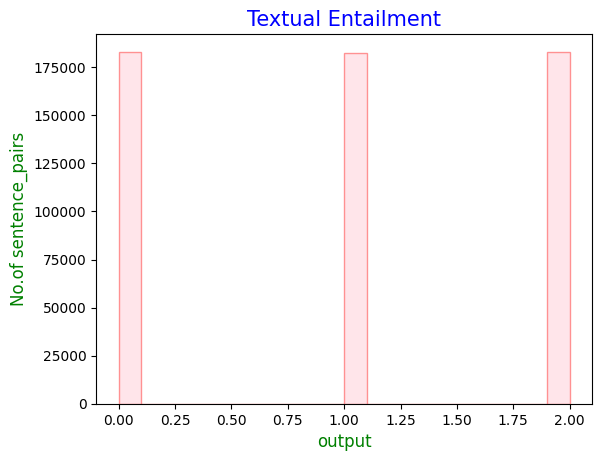

<Figure size 1000x800 with 0 Axes>

In [269]:
df_train['gold_label_num'].hist(alpha=0.4,bins=20,color='pink',edgecolor='r')
plt.title('Textual Entailment',color='b',fontsize=15)

plt.xlabel('output',color='g',fontsize=12)
plt.ylabel('No.of sentence_pairs',color='g',fontsize=12)
plt.grid('bool'=='false')
plt.figure(figsize=(10,8))

plt.show()

In [270]:
train_data=df_train.drop(columns='gold_label')

In [271]:
train_data

sentence1  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2  gold_label_num  
0       A person is training his horse for a competition.               1  
1           A person is at a diner, ordering an omelette.               2  
2                       A person is outdoors, on a horse.               0  
3                       They are smiling at their parents               1  
4                              There are children present               0  
...                                                   ...             ...  
550147           four kids won awards for 'cleanest feet'               2  
550148  four homeless children had their shoes stolen,...               1  
550149  A man in a bodysuit is competing in a surfing ...               1  
550150  A man in a business suit is heading to a board...               2  
550151  On the beautiful blue water there is a man in ...               0  

[548820 rows x 3 columns]

In [272]:
df_valid.shape

(10000, 10)

In [273]:
df_valid.columns

Index(['annotator_labels', 'captionID', 'gold_label', 'pairID', 'sentence1',
       'sentence1_binary_parse', 'sentence1_parse', 'sentence2',
       'sentence2_binary_parse', 'sentence2_parse'],
      dtype='object')

In [274]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   annotator_labels        10000 non-null  object
 1   captionID               10000 non-null  object
 2   gold_label              10000 non-null  object
 3   pairID                  10000 non-null  object
 4   sentence1               10000 non-null  object
 5   sentence1_binary_parse  10000 non-null  object
 6   sentence1_parse         10000 non-null  object
 7   sentence2               10000 non-null  object
 8   sentence2_binary_parse  10000 non-null  object
 9   sentence2_parse         10000 non-null  object
dtypes: object(10)
memory usage: 781.4+ KB


In [275]:
df_valid=df_valid.drop(columns=columns_to_drop)

In [276]:
df_valid

gold_label                                          sentence1  \
0           neutral  Two women are embracing while holding to go pa...   
1        entailment  Two women are embracing while holding to go pa...   
2     contradiction  Two women are embracing while holding to go pa...   
3        entailment  Two young children in blue jerseys, one with t...   
4           neutral  Two young children in blue jerseys, one with t...   
...             ...                                                ...   
9995              -  A small girl wearing a pink jacket is riding o...   
9996  contradiction  A small girl wearing a pink jacket is riding o...   
9997     entailment  A young girl with blue and pink ribbons in her...   
9998  contradiction  A young girl with blue and pink ribbons in her...   
9999        neutral  A young girl with blue and pink ribbons in her...   

                                              sentence2  
0     The sisters are hugging goodbye while holding ...  
1                       Two woman are holding packages.  
2                  The men are fighting outside a deli.  
3        Two kids in numbered jerseys wash their hands.  
4              Two kids at a ballgame wash their hands.  
...                                                 ...  
9995  The girl is sitting on a carved horse made of ...  
9996          The girl is moving at the speed of light.  
9997                         People in a water fountain  
9998                       A young girl knits a sweater  
9999  A young mother tries to grab her topless child...  

[10000 rows x 3 columns]

In [277]:
df_valid['gold_label'].value_counts()

gold_label
entailment       3329
contradiction    3278
neutral          3235
-                 158
Name: count, dtype: int64

In [278]:
df_valid=df_valid.drop(df_valid[df_valid['gold_label']=='-'].index)

In [279]:
df_valid['gold_label_num']=df_valid['gold_label'].apply(lambda x:label_mapping[x])

In [280]:
df_valid

gold_label                                          sentence1  \
0           neutral  Two women are embracing while holding to go pa...   
1        entailment  Two women are embracing while holding to go pa...   
2     contradiction  Two women are embracing while holding to go pa...   
3        entailment  Two young children in blue jerseys, one with t...   
4           neutral  Two young children in blue jerseys, one with t...   
...             ...                                                ...   
9994     entailment  A small girl wearing a pink jacket is riding o...   
9996  contradiction  A small girl wearing a pink jacket is riding o...   
9997     entailment  A young girl with blue and pink ribbons in her...   
9998  contradiction  A young girl with blue and pink ribbons in her...   
9999        neutral  A young girl with blue and pink ribbons in her...   

                                              sentence2  gold_label_num  
0     The sisters are hugging goodbye while holding ...               1  
1                       Two woman are holding packages.               0  
2                  The men are fighting outside a deli.               2  
3        Two kids in numbered jerseys wash their hands.               0  
4              Two kids at a ballgame wash their hands.               1  
...                                                 ...             ...  
9994                            The carousel is moving.               0  
9996          The girl is moving at the speed of light.               2  
9997                         People in a water fountain               0  
9998                       A young girl knits a sweater               2  
9999  A young mother tries to grab her topless child...               1  

[9842 rows x 4 columns]

In [281]:
df_valid.drop(columns='gold_label')

sentence1  \
0     Two women are embracing while holding to go pa...   
1     Two women are embracing while holding to go pa...   
2     Two women are embracing while holding to go pa...   
3     Two young children in blue jerseys, one with t...   
4     Two young children in blue jerseys, one with t...   
...                                                 ...   
9994  A small girl wearing a pink jacket is riding o...   
9996  A small girl wearing a pink jacket is riding o...   
9997  A young girl with blue and pink ribbons in her...   
9998  A young girl with blue and pink ribbons in her...   
9999  A young girl with blue and pink ribbons in her...   

                                              sentence2  gold_label_num  
0     The sisters are hugging goodbye while holding ...               1  
1                       Two woman are holding packages.               0  
2                  The men are fighting outside a deli.               2  
3        Two kids in numbered jerseys wash their hands.               0  
4              Two kids at a ballgame wash their hands.               1  
...                                                 ...             ...  
9994                            The carousel is moving.               0  
9996          The girl is moving at the speed of light.               2  
9997                         People in a water fountain               0  
9998                       A young girl knits a sweater               2  
9999  A young mother tries to grab her topless child...               1  

[9842 rows x 3 columns]

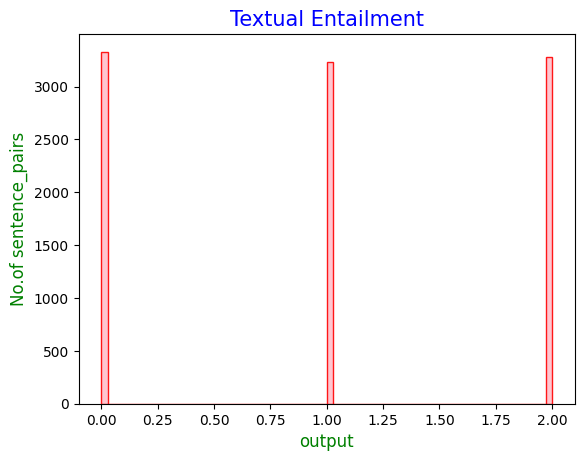

<Figure size 1000x800 with 0 Axes>

In [282]:
df_valid['gold_label_num'].hist(alpha=0.9,bins=70,color='pink',edgecolor='r')
plt.title('Textual Entailment',color='b',fontsize=15)

plt.xlabel('output',color='g',fontsize=12)
plt.ylabel('No.of sentence_pairs',color='g',fontsize=12)
plt.grid('bool'=='false')
plt.figure(figsize=(10,8))

plt.show()

In [283]:
df_test=df_test.drop(columns=columns_to_drop)

In [284]:
df_test

gold_label                                          sentence1  \
0           neutral  This church choir sings to the masses as they ...   
1        entailment  This church choir sings to the masses as they ...   
2     contradiction  This church choir sings to the masses as they ...   
3           neutral  A woman with a green headscarf, blue shirt and...   
4        entailment  A woman with a green headscarf, blue shirt and...   
...             ...                                                ...   
9995  contradiction        Two women are observing something together.   
9996     entailment        Two women are observing something together.   
9997  contradiction  A man in a black leather jacket and a book in ...   
9998     entailment  A man in a black leather jacket and a book in ...   
9999        neutral  A man in a black leather jacket and a book in ...   

                                           sentence2  
0              The church has cracks in the ceiling.  
1                    The church is filled with song.  
2                A choir singing at a baseball game.  
3                                The woman is young.  
4                           The woman is very happy.  
...                                              ...  
9995  Two women are standing with their eyes closed.  
9996             Two girls are looking at something.  
9997                         A man is flying a kite.  
9998               A man is speaking in a classroom.  
9999       A man is teaching science in a classroom.  

[10000 rows x 3 columns]

In [285]:
test_data=df_test.drop(columns='gold_label')

In [286]:
test_data

sentence1  \
0     This church choir sings to the masses as they ...   
1     This church choir sings to the masses as they ...   
2     This church choir sings to the masses as they ...   
3     A woman with a green headscarf, blue shirt and...   
4     A woman with a green headscarf, blue shirt and...   
...                                                 ...   
9995        Two women are observing something together.   
9996        Two women are observing something together.   
9997  A man in a black leather jacket and a book in ...   
9998  A man in a black leather jacket and a book in ...   
9999  A man in a black leather jacket and a book in ...   

                                           sentence2  
0              The church has cracks in the ceiling.  
1                    The church is filled with song.  
2                A choir singing at a baseball game.  
3                                The woman is young.  
4                           The woman is very happy.  
...                                              ...  
9995  Two women are standing with their eyes closed.  
9996             Two girls are looking at something.  
9997                         A man is flying a kite.  
9998               A man is speaking in a classroom.  
9999       A man is teaching science in a classroom.  

[10000 rows x 2 columns]

In [287]:
df_valid.duplicated().any()

True

In [288]:
df_valid.drop_duplicates()

gold_label                                          sentence1  \
0           neutral  Two women are embracing while holding to go pa...   
1        entailment  Two women are embracing while holding to go pa...   
2     contradiction  Two women are embracing while holding to go pa...   
3        entailment  Two young children in blue jerseys, one with t...   
4           neutral  Two young children in blue jerseys, one with t...   
...             ...                                                ...   
9994     entailment  A small girl wearing a pink jacket is riding o...   
9996  contradiction  A small girl wearing a pink jacket is riding o...   
9997     entailment  A young girl with blue and pink ribbons in her...   
9998  contradiction  A young girl with blue and pink ribbons in her...   
9999        neutral  A young girl with blue and pink ribbons in her...   

                                              sentence2  gold_label_num  
0     The sisters are hugging goodbye while holding ...               1  
1                       Two woman are holding packages.               0  
2                  The men are fighting outside a deli.               2  
3        Two kids in numbered jerseys wash their hands.               0  
4              Two kids at a ballgame wash their hands.               1  
...                                                 ...             ...  
9994                            The carousel is moving.               0  
9996          The girl is moving at the speed of light.               2  
9997                         People in a water fountain               0  
9998                       A young girl knits a sweater               2  
9999  A young mother tries to grab her topless child...               1  

[9840 rows x 4 columns]

In [289]:
df_valid.shape

(9842, 4)

In [290]:
valid_data=df_valid.drop(columns='gold_label')

In [291]:
valid_data

sentence1  \
0     Two women are embracing while holding to go pa...   
1     Two women are embracing while holding to go pa...   
2     Two women are embracing while holding to go pa...   
3     Two young children in blue jerseys, one with t...   
4     Two young children in blue jerseys, one with t...   
...                                                 ...   
9994  A small girl wearing a pink jacket is riding o...   
9996  A small girl wearing a pink jacket is riding o...   
9997  A young girl with blue and pink ribbons in her...   
9998  A young girl with blue and pink ribbons in her...   
9999  A young girl with blue and pink ribbons in her...   

                                              sentence2  gold_label_num  
0     The sisters are hugging goodbye while holding ...               1  
1                       Two woman are holding packages.               0  
2                  The men are fighting outside a deli.               2  
3        Two kids in numbered jerseys wash their hands.               0  
4              Two kids at a ballgame wash their hands.               1  
...                                                 ...             ...  
9994                            The carousel is moving.               0  
9996          The girl is moving at the speed of light.               2  
9997                         People in a water fountain               0  
9998                       A young girl knits a sweater               2  
9999  A young mother tries to grab her topless child...               1  

[9842 rows x 3 columns]

In [292]:
df_valid.isnull().any()

gold_label        False
sentence1         False
sentence2         False
gold_label_num    False
dtype: bool

In [293]:
text_data=train_data.select_dtypes(include='object')
text_data

sentence1  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2  
0       A person is training his horse for a competition.  
1           A person is at a diner, ordering an omelette.  
2                       A person is outdoors, on a horse.  
3                       They are smiling at their parents  
4                              There are children present  
...                                                   ...  
550147           four kids won awards for 'cleanest feet'  
550148  four homeless children had their shoes stolen,...  
550149  A man in a bodysuit is competing in a surfing ...  
550150  A man in a business suit is heading to a board...  
550151  On the beautiful blue water there is a man in ...  

[548820 rows x 2 columns]

In [294]:
valid_data.select_dtypes(include='object')

sentence1  \
0     Two women are embracing while holding to go pa...   
1     Two women are embracing while holding to go pa...   
2     Two women are embracing while holding to go pa...   
3     Two young children in blue jerseys, one with t...   
4     Two young children in blue jerseys, one with t...   
...                                                 ...   
9994  A small girl wearing a pink jacket is riding o...   
9996  A small girl wearing a pink jacket is riding o...   
9997  A young girl with blue and pink ribbons in her...   
9998  A young girl with blue and pink ribbons in her...   
9999  A young girl with blue and pink ribbons in her...   

                                              sentence2  
0     The sisters are hugging goodbye while holding ...  
1                       Two woman are holding packages.  
2                  The men are fighting outside a deli.  
3        Two kids in numbered jerseys wash their hands.  
4              Two kids at a ballgame wash their hands.  
...                                                 ...  
9994                            The carousel is moving.  
9996          The girl is moving at the speed of light.  
9997                         People in a water fountain  
9998                       A young girl knits a sweater  
9999  A young mother tries to grab her topless child...  

[9842 rows x 2 columns]

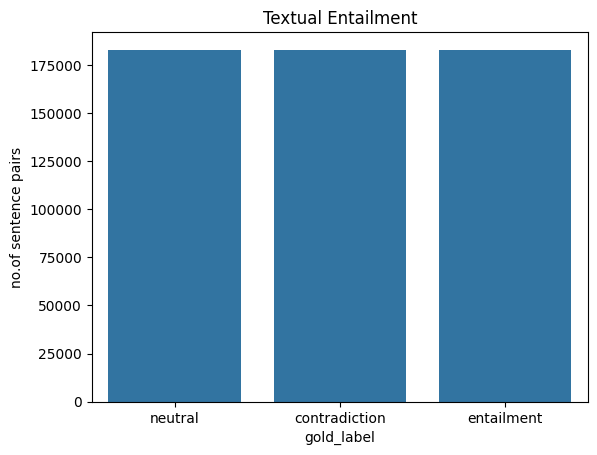

In [295]:
sb.countplot(x='gold_label',data=df_train)
plt.title('Textual Entailment')
plt.xlabel('gold_label')
plt.ylabel('no.of sentence pairs')

plt.show()


In [296]:
df_train['gold_label'].value_counts()

gold_label
contradiction    183097
entailment       183052
neutral          182671
Name: count, dtype: int64

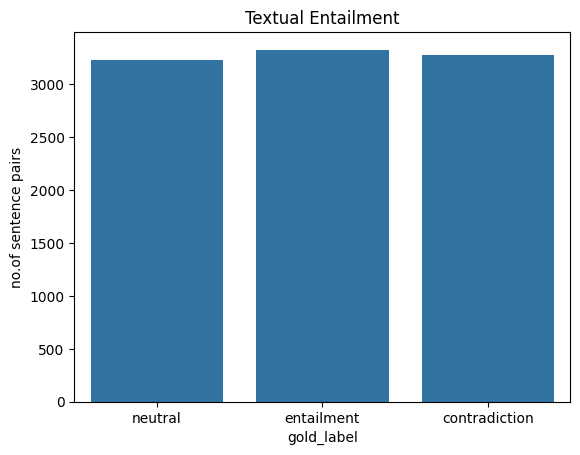

In [297]:
sb.countplot(x='gold_label',data=df_valid)

plt.title('Textual Entailment')
plt.xlabel('gold_label')
plt.ylabel('no.of sentence pairs')

plt.show()


In [298]:
df_valid['gold_label'].value_counts()

gold_label
entailment       3329
contradiction    3278
neutral          3235
Name: count, dtype: int64

## TEXT LENGTH ANALYSIS

In [299]:
train_data['sentence1_length'] = train_data['sentence1'].apply(len)
train_data['sentence2_length'] = train_data['sentence2'].apply(len)


In [300]:
train_data

sentence1  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2  gold_label_num  \
0       A person is training his horse for a competition.               1   
1           A person is at a diner, ordering an omelette.               2   
2                       A person is outdoors, on a horse.               0   
3                       They are smiling at their parents               1   
4                              There are children present               0   
...                                                   ...             ...   
550147           four kids won awards for 'cleanest feet'               2   
550148  four homeless children had their shoes stolen,...               1   
550149  A man in a bodysuit is competing in a surfing ...               1   
550150  A man in a business suit is heading to a board...               2   
550151  On the beautiful blue water there is a man in ...               0   

        sentence1_length  sentence2_length  
0                     54                49  
1                     54                45  
2                     54                33  
3                     37                33  
4                     37                26  
...                  ...               ...  
550147                35                40  
550148                35                71  
550149                55                58  
550150                55                55  
550151                55                65  

[548820 rows x 5 columns]

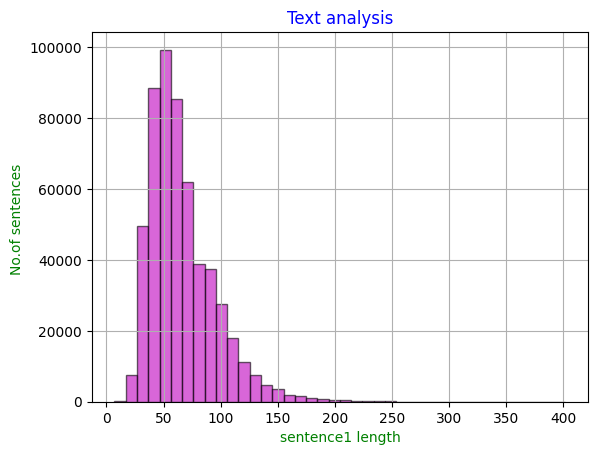

<Figure size 1000x800 with 0 Axes>

In [301]:
train_data['sentence1_length'].hist(bins=40,color='m',edgecolor='black',alpha=0.6)

plt.title('Text analysis',color='b')
plt.xlabel('sentence1 length',color='g')
plt.ylabel('No.of sentences ',color='g')
plt.figure(figsize=(10,8))


plt.show()

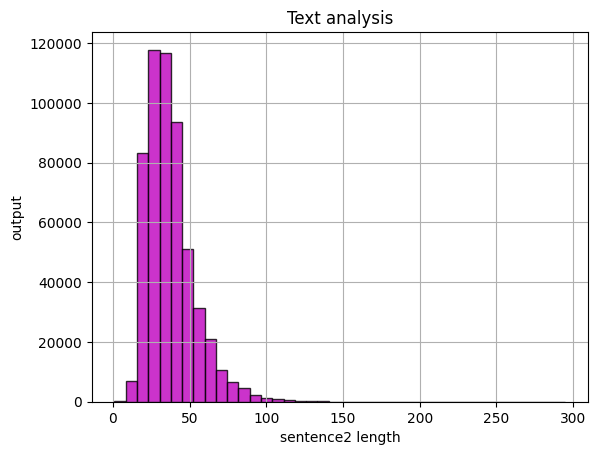

<Figure size 1000x800 with 0 Axes>

In [302]:
train_data['sentence2_length'].hist(bins=40,color='m',edgecolor='black',alpha=0.8)

plt.title('Text analysis')
plt.xlabel('sentence2 length')
plt.ylabel('output')
plt.figure(figsize=(10,8))


plt.show()

In [303]:
valid_data['sentence1_length']=valid_data['sentence1'].apply(len)
valid_data['sentence2_length']=valid_data['sentence2'].apply(len)

In [304]:

valid_data

sentence1  \
0     Two women are embracing while holding to go pa...   
1     Two women are embracing while holding to go pa...   
2     Two women are embracing while holding to go pa...   
3     Two young children in blue jerseys, one with t...   
4     Two young children in blue jerseys, one with t...   
...                                                 ...   
9994  A small girl wearing a pink jacket is riding o...   
9996  A small girl wearing a pink jacket is riding o...   
9997  A young girl with blue and pink ribbons in her...   
9998  A young girl with blue and pink ribbons in her...   
9999  A young girl with blue and pink ribbons in her...   

                                              sentence2  gold_label_num  \
0     The sisters are hugging goodbye while holding ...               1   
1                       Two woman are holding packages.               0   
2                  The men are fighting outside a deli.               2   
3        Two kids in numbered jerseys wash their hands.               0   
4              Two kids at a ballgame wash their hands.               1   
...                                                 ...             ...   
9994                            The carousel is moving.               0   
9996          The girl is moving at the speed of light.               2   
9997                         People in a water fountain               0   
9998                       A young girl knits a sweater               2   
9999  A young mother tries to grab her topless child...               1   

      sentence1_length  sentence2_length  
0                   53                85  
1                   53                31  
2                   53                36  
3                  161                46  
4                  161                40  
...                ...               ...  
9994                59                23  
9996                59                41  
9997               154                26  
9998               154                28  
9999               154                97  

[9842 rows x 5 columns]

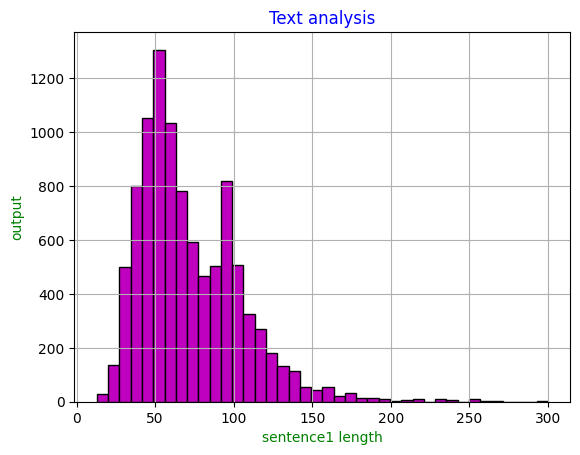

<Figure size 1000x800 with 0 Axes>

In [305]:
valid_data['sentence1_length'].hist(color='m',bins=40,edgecolor='black')

plt.title('Text analysis',color='b')
plt.xlabel('sentence1 length',color='g')
plt.ylabel('output',color='g')
plt.figure(figsize=(10,8))


plt.show()

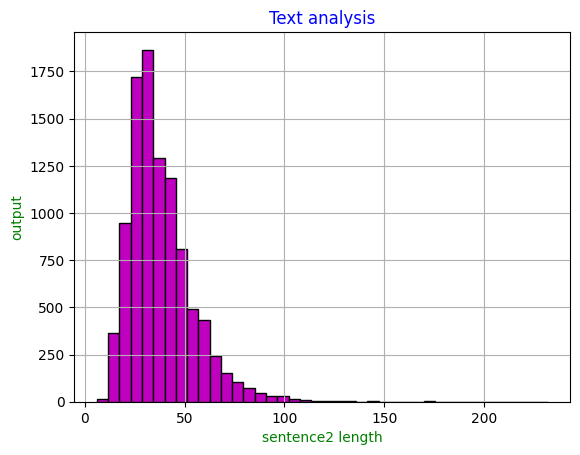

<Figure size 1000x800 with 0 Axes>

In [306]:
valid_data['sentence2_length'].hist(color='m',bins=40,edgecolor='black')

plt.title('Text analysis',color='b')
plt.xlabel('sentence2 length',color='g')
plt.ylabel('output',color='g')
plt.figure(figsize=(10,8))


plt.show()

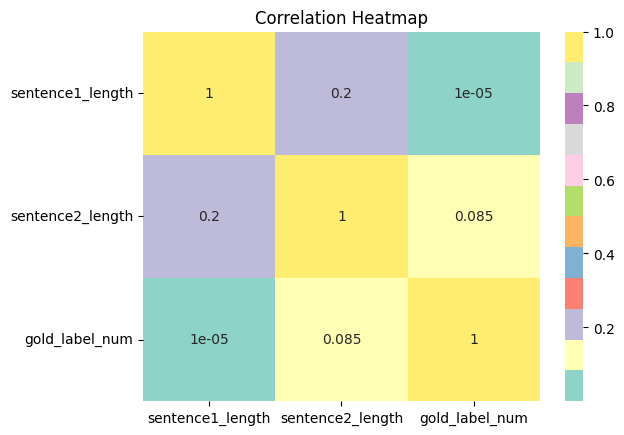

In [307]:

correlation_matrix = train_data[['sentence1_length', 'sentence2_length', 'gold_label_num']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='Set3')
plt.title('Correlation Heatmap')
plt.show()


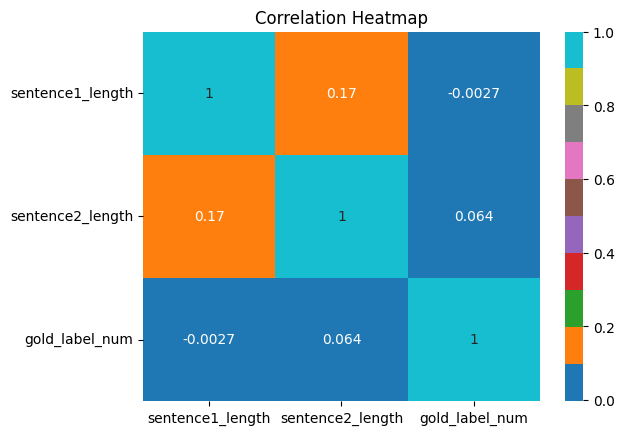

In [308]:

correlation_matrix = valid_data[['sentence1_length', 'sentence2_length', 'gold_label_num']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='tab10')
plt.title('Correlation Heatmap')
plt.show()


In [309]:
train_data['sentence1_length'].describe()

count    548820.000000
mean         66.257886
std          29.371664
min           7.000000
25%          46.000000
50%          60.000000
75%          80.000000
max         402.000000
Name: sentence1_length, dtype: float64

In [310]:
train_data['sentence2_length'].describe()

count    548820.000000
mean         37.478446
std          15.862066
min           1.000000
25%          27.000000
50%          34.000000
75%          45.000000
max         295.000000
Name: sentence2_length, dtype: float64

In [311]:
train_describe=train_data[['sentence1_length','sentence2_length']].describe()

In [312]:
train_describe

sentence1_length  sentence2_length
count     548820.000000     548820.000000
mean          66.257886         37.478446
std           29.371664         15.862066
min            7.000000          1.000000
25%           46.000000         27.000000
50%           60.000000         34.000000
75%           80.000000         45.000000
max          402.000000        295.000000

In [313]:
valid_data['sentence2_length'].describe()

count    9842.000000
mean       37.897887
std        16.385647
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max       232.000000
Name: sentence2_length, dtype: float64

In [314]:
valid_data['sentence1_length'].describe()

count    9842.000000
mean       72.250457
std        32.890431
min        13.000000
25%        48.000000
50%        64.000000
75%        93.000000
max       300.000000
Name: sentence1_length, dtype: float64

In [315]:
test_data['sentence1_length']=test_data['sentence1'].apply(len)

In [316]:
test_data['sentence2_length']=test_data['sentence2'].apply(len)

In [317]:
test_data

sentence1  \
0     This church choir sings to the masses as they ...   
1     This church choir sings to the masses as they ...   
2     This church choir sings to the masses as they ...   
3     A woman with a green headscarf, blue shirt and...   
4     A woman with a green headscarf, blue shirt and...   
...                                                 ...   
9995        Two women are observing something together.   
9996        Two women are observing something together.   
9997  A man in a black leather jacket and a book in ...   
9998  A man in a black leather jacket and a book in ...   
9999  A man in a black leather jacket and a book in ...   

                                           sentence2  sentence1_length  \
0              The church has cracks in the ceiling.                90   
1                    The church is filled with song.                90   
2                A choir singing at a baseball game.                90   
3                                The woman is young.                63   
4                           The woman is very happy.                63   
...                                              ...               ...   
9995  Two women are standing with their eyes closed.                43   
9996             Two girls are looking at something.                43   
9997                         A man is flying a kite.                77   
9998               A man is speaking in a classroom.                77   
9999       A man is teaching science in a classroom.                77   

      sentence2_length  
0                   37  
1                   31  
2                   35  
3                   19  
4                   24  
...                ...  
9995                46  
9996                35  
9997                23  
9998                33  
9999                41  

[10000 rows x 4 columns]

In [318]:
test_data['sentence1_length'].describe()

count    10000.000000
mean        72.106100
std         32.156798
min          9.000000
25%         48.000000
50%         65.000000
75%         93.000000
max        265.000000
Name: sentence1_length, dtype: float64

In [319]:
test_data['sentence2_length'].describe()

count    10000.000000
mean        37.784300
std         16.122362
min          3.000000
25%         26.000000
50%         34.000000
75%         45.000000
max        159.000000
Name: sentence2_length, dtype: float64

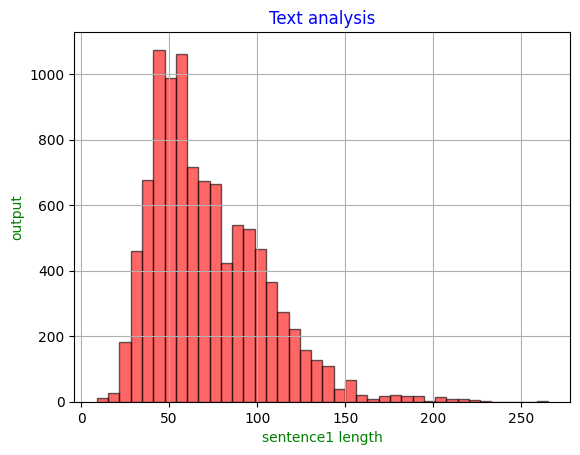

<Figure size 1000x800 with 0 Axes>

In [320]:
test_data['sentence1_length'].hist(color='r',bins=40,edgecolor='black',alpha=0.6)

plt.title('Text analysis',color='b')
plt.xlabel('sentence1 length',color='g')
plt.ylabel('output',color='g')
plt.figure(figsize=(10,8))


plt.show()

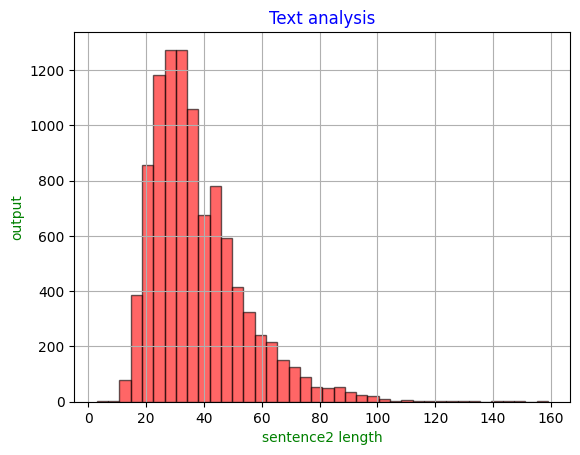

<Figure size 1000x800 with 0 Axes>

In [321]:

test_data['sentence2_length'].hist(color='r',bins=40,edgecolor='black',alpha=0.6)

plt.title('Text analysis',color='b')
plt.xlabel('sentence2 length',color='g')
plt.ylabel('output',color='g')
plt.figure(figsize=(10,8))


plt.show()

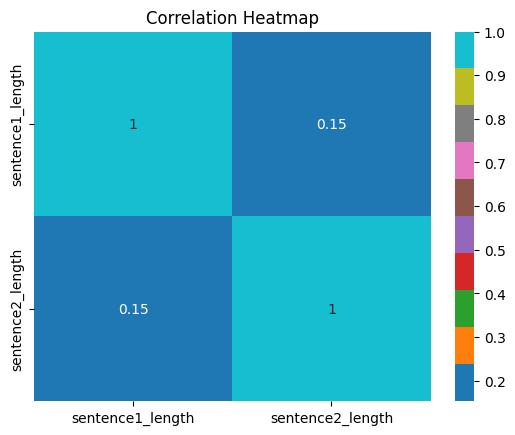

In [322]:
correlation_matrix=test_data[['sentence1_length','sentence2_length']].corr()

sb.heatmap(correlation_matrix, annot=True, cmap='tab10')
plt.title('Correlation Heatmap')
plt.show()


In [323]:
valid_data.max()

sentence1           young female in striped shirt holding baby boy...
sentence2                             young ladies are riding a boat.
gold_label_num                                                      2
sentence1_length                                                  300
sentence2_length                                                  232
dtype: object

In [324]:
train_data.max()

sentence1                youth floor hockey at school
sentence2           zebras are sleeping in their cage
gold_label_num                                      2
sentence1_length                                  402
sentence2_length                                  295
dtype: object

In [325]:
import plotly.express as px

fig = px.scatter(train_data, x='sentence1_length', y='sentence2_length', title='Sentence Lengths and Labels')
fig.show()


In [326]:
import plotly.express as px

fig = px.scatter(valid_data, x='sentence1_length', y='sentence2_length', title='Sentence Lengths and Labels')
fig.show()


### overview of word distribution

In [327]:
!pip install nltk

In [328]:
!pip install contractions


In [329]:

import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import contractions
from nltk.tokenize import word_tokenize
import collections
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [330]:
set_stopwords=set(stopwords.words('english'))

In [331]:
set_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [332]:
len(set_stopwords)

179

In [333]:
set_negation_stopwords=set(['no','never','none','not','but','n\'t'])
set_stopwords_data=set_stopwords-set_negation_stopwords

In [334]:
set_stopwords_data

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'sh

In [335]:
len(set_stopwords_data)

176

In [336]:
def preprocess_text(text):

    text=contractions.fix(text)


    text=text.lower()

    text=re.sub(r'[^\w\s]','',text)

    text=text.strip()

    text=re.sub(r'\s+',' ',text)

    tokens=word_tokenize(text)

    processed_tokens=[token for token in tokens if token not in set_stopwords_data and len(tokens) > 2]

    processed_text=' '.join(processed_tokens)

    return processed_text

In [337]:
train_data["sentence1_token"]=train_data["sentence1"].apply(preprocess_text)

In [338]:
train_data['sentence2_token']=train_data['sentence2'].apply(preprocess_text)

In [339]:
train_data.head()

sentence1  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2  A person on a horse jumps over a broken down a...   
3              Children smiling and waving at camera   
4              Children smiling and waving at camera   

                                           sentence2  gold_label_num  \
0  A person is training his horse for a competition.               1   
1      A person is at a diner, ordering an omelette.               2   
2                  A person is outdoors, on a horse.               0   
3                  They are smiling at their parents               1   
4                         There are children present               0   

   sentence1_length  sentence2_length                     sentence1_token  \
0                54                49  person horse jumps broken airplane   
1                54                45  person horse jumps broken airplane   
2                54                33  person horse jumps broken airplane   
3                37                33      children smiling waving camera   
4                37                26      children smiling waving camera   

                     sentence2_token  
0  person training horse competition  
1     person diner ordering omelette  
2              person outdoors horse  
3                    smiling parents  
4                   children present

In [340]:
valid_data["sentence1_token"]=valid_data["sentence1"].apply(preprocess_text)
valid_data["sentence2_token"]=valid_data["sentence2"].apply(preprocess_text)

In [341]:

valid_data.head()

sentence1  \
0  Two women are embracing while holding to go pa...   
1  Two women are embracing while holding to go pa...   
2  Two women are embracing while holding to go pa...   
3  Two young children in blue jerseys, one with t...   
4  Two young children in blue jerseys, one with t...   

                                           sentence2  gold_label_num  \
0  The sisters are hugging goodbye while holding ...               1   
1                    Two woman are holding packages.               0   
2               The men are fighting outside a deli.               2   
3     Two kids in numbered jerseys wash their hands.               0   
4           Two kids at a ballgame wash their hands.               1   

   sentence1_length  sentence2_length  \
0                53                85   
1                53                31   
2                53                36   
3               161                46   
4               161                40   

                                     sentence1_token  \
0            two women embracing holding go packages   
1            two women embracing holding go packages   
2            two women embracing holding go packages   
3  two young children blue jerseys one number 9 o...   
4  two young children blue jerseys one number 9 o...   

                                     sentence2_token  
0  sisters hugging goodbye holding go packages ea...  
1                         two woman holding packages  
2                          men fighting outside deli  
3               two kids numbered jerseys wash hands  
4                       two kids ballgame wash hands

In [342]:
train_data['sentence1_length_token'] = train_data['sentence1_token'].apply(len)

In [343]:

train_data['sentence2_length_token'] = train_data['sentence2_token'].apply(len)

In [344]:
train_data

sentence1  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2  gold_label_num  \
0       A person is training his horse for a competition.               1   
1           A person is at a diner, ordering an omelette.               2   
2                       A person is outdoors, on a horse.               0   
3                       They are smiling at their parents               1   
4                              There are children present               0   
...                                                   ...             ...   
550147           four kids won awards for 'cleanest feet'               2   
550148  four homeless children had their shoes stolen,...               1   
550149  A man in a bodysuit is competing in a surfing ...               1   
550150  A man in a business suit is heading to a board...               2   
550151  On the beautiful blue water there is a man in ...               0   

        sentence1_length  sentence2_length  \
0                     54                49   
1                     54                45   
2                     54                33   
3                     37                33   
4                     37                26   
...                  ...               ...   
550147                35                40   
550148                35                71   
550149                55                58   
550150                55                55   
550151                55                65   

                                  sentence1_token  \
0              person horse jumps broken airplane   
1              person horse jumps broken airplane   
2              person horse jumps broken airplane   
3                  children smiling waving camera   
4                  children smiling waving camera   
...                                           ...   
550147             four dirty barefooted children   
550148             four dirty barefooted children   
550149  man surfing bodysuit beautiful blue water   
550150  man surfing bodysuit beautiful blue water   
550151  man surfing bodysuit beautiful blue water   

                                       sentence2_token  \
0                    person training horse competition   
1                       person diner ordering omelette   
2                                person outdoors horse   
3                                      smiling parents   
4                                     children present   
...                                                ...   
550147                  four kids awards cleanest feet   
550148  four homeless children shoes stolen feet dirty   
550149      man bodysuit competing surfing competition   
550150         man business suit heading board meeting   
550151       beautiful blue water man bodysuit surfing   

        sentence1_length_token  sentence2_length_token  
0                           34                      33  
1                           34                      30  
2                           34                      21  
3                           30                      15  
4                           30                      16  
...                        ...                     ...  
550147                      30                      30  
550148                      30                 

In [345]:
train_data['sentence1_length_token'].max()

277

In [346]:
train_data.describe()

gold_label_num  sentence1_length  sentence2_length  \
count   548820.000000     548820.000000     548820.000000   
mean         1.000082         66.257886         37.478446   
std          0.816797         29.371664         15.862066   
min          0.000000          7.000000          1.000000   
25%          0.000000         46.000000         27.000000   
50%          1.000000         60.000000         34.000000   
75%          2.000000         80.000000         45.000000   
max          2.000000        402.000000        295.000000   

       sentence1_length_token  sentence2_length_token  
count           548820.000000           548820.000000  
mean                47.334018               25.272875  
std                 21.027090               11.684260  
min                  0.000000                0.000000  
25%                 33.000000               17.000000  
50%                 43.000000               23.000000  
75%                 57.000000               31.000000  
max                277.000000              203.000000

In [347]:
valid_data['sentence1_length_token'] = valid_data['sentence1_token'].apply(len)

In [348]:
valid_data['sentence2_length_token'] = valid_data['sentence2_token'].apply(len)

In [349]:
valid_data

sentence1  \
0     Two women are embracing while holding to go pa...   
1     Two women are embracing while holding to go pa...   
2     Two women are embracing while holding to go pa...   
3     Two young children in blue jerseys, one with t...   
4     Two young children in blue jerseys, one with t...   
...                                                 ...   
9994  A small girl wearing a pink jacket is riding o...   
9996  A small girl wearing a pink jacket is riding o...   
9997  A young girl with blue and pink ribbons in her...   
9998  A young girl with blue and pink ribbons in her...   
9999  A young girl with blue and pink ribbons in her...   

                                              sentence2  gold_label_num  \
0     The sisters are hugging goodbye while holding ...               1   
1                       Two woman are holding packages.               0   
2                  The men are fighting outside a deli.               2   
3        Two kids in numbered jerseys wash their hands.               0   
4              Two kids at a ballgame wash their hands.               1   
...                                                 ...             ...   
9994                            The carousel is moving.               0   
9996          The girl is moving at the speed of light.               2   
9997                         People in a water fountain               0   
9998                       A young girl knits a sweater               2   
9999  A young mother tries to grab her topless child...               1   

      sentence1_length  sentence2_length  \
0                   53                85   
1                   53                31   
2                   53                36   
3                  161                46   
4                  161                40   
...                ...               ...   
9994                59                23   
9996                59                41   
9997               154                26   
9998               154                28   
9999               154                97   

                                        sentence1_token  \
0               two women embracing holding go packages   
1               two women embracing holding go packages   
2               two women embracing holding go packages   
3     two young children blue jerseys one number 9 o...   
4     two young children blue jerseys one number 9 o...   
...                                                 ...   
9994     small girl wearing pink jacket riding carousel   
9996     small girl wearing pink jacket riding carousel   
9997  young girl blue pink ribbons braids without to...   
9998  young girl blue pink ribbons braids without to...   
9999  young girl blue pink ribbons braids without to...   

                                        sentence2_token  \
0     sisters hugging goodbye holding go packages ea...   
1                            two woman holding packages   
2                             men fighting outside deli   
3                  two kids numbered jerseys wash hands   
4                          two kids ballgame wash hands   
...                                                 ...   
9994                                    carousel moving   
9996                            girl moving speed light   
9997                              people water fountain   
9998                           young girl knits sweater   
9999  young mother tries grab topless child water fo...   

      sentence1_length_token  sentence2_length_token  
0                         39                      56  
1                         39                      26  
2                         39                      25  
3                        107                      36  
4                        107                      28  
...                      ...                     ...  
9994                      46                      15  
9996                      46                     

In [350]:
valid_data.describe()

gold_label_num  sentence1_length  sentence2_length  \
count     9842.000000       9842.000000       9842.000000   
mean         0.994818         72.250457         37.897887   
std          0.819358         32.890431         16.385647   
min          0.000000         13.000000          6.000000   
25%          0.000000         48.000000         27.000000   
50%          1.000000         64.000000         35.000000   
75%          2.000000         93.000000         45.000000   
max          2.000000        300.000000        232.000000   

       sentence1_length_token  sentence2_length_token  
count             9842.000000             9842.000000  
mean                51.540642               25.592258  
std                 23.603597               12.078650  
min                  0.000000                0.000000  
25%                 34.000000               17.000000  
50%                 46.000000               23.000000  
75%                 65.000000               31.000000  
max                237.000000              151.000000

In [351]:
train_data['word_count_sent1']=train_data['sentence1_token'].apply(lambda x:len(nltk.word_tokenize(x)))

In [352]:
train_data['word_count_sent2']=train_data['sentence2_token'].apply(lambda x:len(nltk.word_tokenize(x)))

In [353]:
train_data.head()

sentence1  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2  A person on a horse jumps over a broken down a...   
3              Children smiling and waving at camera   
4              Children smiling and waving at camera   

                                           sentence2  gold_label_num  \
0  A person is training his horse for a competition.               1   
1      A person is at a diner, ordering an omelette.               2   
2                  A person is outdoors, on a horse.               0   
3                  They are smiling at their parents               1   
4                         There are children present               0   

   sentence1_length  sentence2_length                     sentence1_token  \
0                54                49  person horse jumps broken airplane   
1                54                45  person horse jumps broken airplane   
2                54                33  person horse jumps broken airplane   
3                37                33      children smiling waving camera   
4                37                26      children smiling waving camera   

                     sentence2_token  sentence1_length_token  \
0  person training horse competition                      34   
1     person diner ordering omelette                      34   
2              person outdoors horse                      34   
3                    smiling parents                      30   
4                   children present                      30   

   sentence2_length_token  word_count_sent1  word_count_sent2  
0                      33                 5                 4  
1                      30                 5                 4  
2                      21                 5                 3  
3                      15                 4                 2  
4                      16                 4                 2

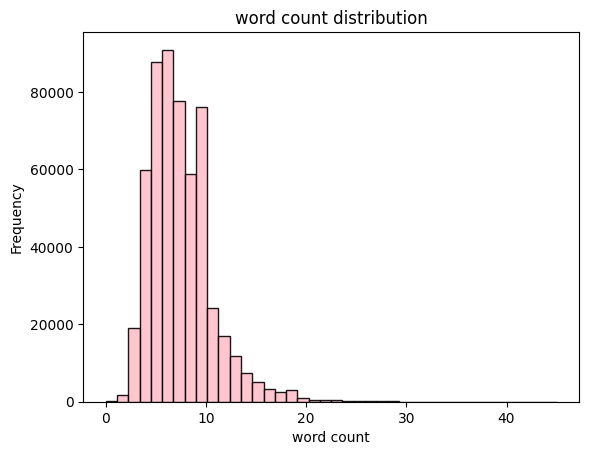

In [354]:
train_data['word_count_sent1'].hist(bins=40,color='pink',alpha=0.9,edgecolor='black')

plt.title('word count distribution')
plt.xlabel('word count')
plt.ylabel('Frequency')
plt.grid(bool==False)
plt.show()

In [355]:
word_freq_sent1 = Counter()
for text in train_data['sentence1_token'].apply(word_tokenize):
    word_freq_sent1.update(text)

In [356]:
sentence1_words = ' '.join(train_data['sentence1_token']).split()

In [357]:

common_words_sent1=word_freq_sent1.most_common(20)

In [358]:
print(common_words_sent1)

[('man', 150591), ('woman', 78276), ('two', 75498), ('people', 60100), ('wearing', 60057), ('white', 49836), ('shirt', 49080), ('black', 46758), ('young', 46611), ('blue', 42619), ('red', 36476), ('sitting', 34727), ('standing', 33680), ('girl', 33545), ('men', 33250), ('boy', 33092), ('dog', 30305), ('playing', 30014), ('front', 28514), ('street', 28039)]


In [359]:
common_words_sent1 = pd.DataFrame(word_freq_sent1.most_common(20), columns=['Word', 'Frequency'])


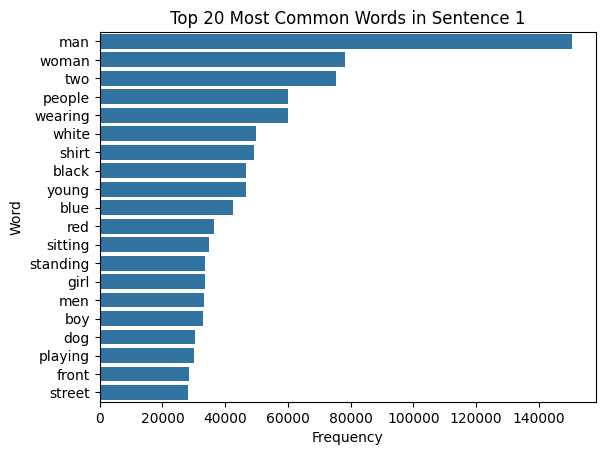

In [360]:
sb.barplot(x='Frequency', y='Word', data=common_words_sent1)
plt.title('Top 20 Most Common Words in Sentence 1')
plt.show()

In [361]:
word_freq_sent2=Counter()

for text in train_data['sentence2_token'].apply(word_tokenize):
    word_freq_sent2.update(text)

In [362]:
sentence2_words = ' '.join(train_data['sentence2_token']).split()

In [363]:
common_word_sent2=word_freq_sent2.most_common(20)

In [364]:
print(common_word_sent2)

[('man', 113546), ('people', 60578), ('woman', 58041), ('two', 46391), ('playing', 29285), ('men', 27459), ('girl', 25181), ('boy', 24743), ('dog', 23340), ('outside', 22214), ('wearing', 20797), ('person', 20031), ('sitting', 18859), ('group', 16373), ('women', 15562), ('young', 14844), ('child', 14383), ('walking', 12973), ('standing', 12536), ('children', 10896)]


In [365]:
common_word_sent2=pd.DataFrame(word_freq_sent2.most_common(20),columns=['word','frequency'])

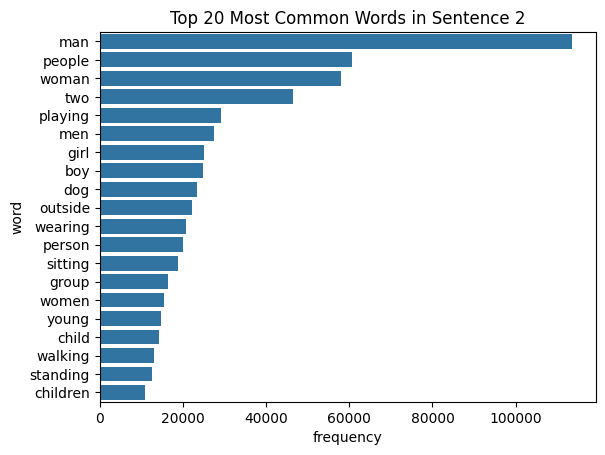

In [366]:
sb.barplot(x='frequency',y='word',data=common_word_sent2)
plt.title('Top 20 Most Common Words in Sentence 2')
plt.show()

In [367]:
valid_data['word_count_sent1']=valid_data['sentence1_token'].apply(lambda x:len(nltk.word_tokenize(x)))

In [368]:
valid_data['word_count_sent2']=valid_data['sentence2_token'].apply(lambda x:len(nltk.word_tokenize(x)))

In [369]:
valid_data.head()

sentence1  \
0  Two women are embracing while holding to go pa...   
1  Two women are embracing while holding to go pa...   
2  Two women are embracing while holding to go pa...   
3  Two young children in blue jerseys, one with t...   
4  Two young children in blue jerseys, one with t...   

                                           sentence2  gold_label_num  \
0  The sisters are hugging goodbye while holding ...               1   
1                    Two woman are holding packages.               0   
2               The men are fighting outside a deli.               2   
3     Two kids in numbered jerseys wash their hands.               0   
4           Two kids at a ballgame wash their hands.               1   

   sentence1_length  sentence2_length  \
0                53                85   
1                53                31   
2                53                36   
3               161                46   
4               161                40   

                                     sentence1_token  \
0            two women embracing holding go packages   
1            two women embracing holding go packages   
2            two women embracing holding go packages   
3  two young children blue jerseys one number 9 o...   
4  two young children blue jerseys one number 9 o...   

                                     sentence2_token  sentence1_length_token  \
0  sisters hugging goodbye holding go packages ea...                      39   
1                         two woman holding packages                      39   
2                          men fighting outside deli                      39   
3               two kids numbered jerseys wash hands                     107   
4                       two kids ballgame wash hands                     107   

   sentence2_length_token  word_count_sent1  word_count_sent2  
0                      56                 6                 8  
1                      26                 6                 4  
2                      25                 6                 4  
3                      36                18                 6  
4                      28                18                 5

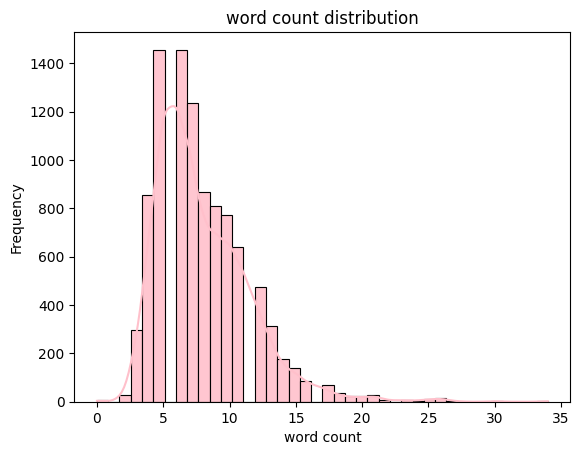

In [370]:
sb.histplot(valid_data['word_count_sent1'],bins=40,color='pink',kde=True,alpha=0.9,edgecolor='black')

plt.title('word count distribution')
plt.xlabel('word count')
plt.ylabel('Frequency')
plt.grid(bool==False)
plt.show()

In [371]:
word_freq_sent1 = Counter()
for text in valid_data['sentence1_token'].apply(word_tokenize):
    word_freq_sent1.update(text)

In [372]:
sentence1_words_valid = ' '.join(valid_data['sentence1_token']).split()

In [373]:
common_word_sent1=word_freq_sent1.most_common(20)

In [374]:
print(common_word_sent1)

[('man', 2868), ('woman', 1541), ('two', 1385), ('wearing', 1203), ('people', 1105), ('shirt', 1054), ('black', 958), ('white', 936), ('young', 918), ('blue', 917), ('red', 720), ('girl', 693), ('standing', 670), ('sitting', 649), ('one', 598), ('front', 597), ('men', 587), ('boy', 570), ('group', 546), ('walking', 518)]


In [375]:
common_word_sent1=pd.DataFrame(word_freq_sent1.most_common(20),columns=['word','frequency'])

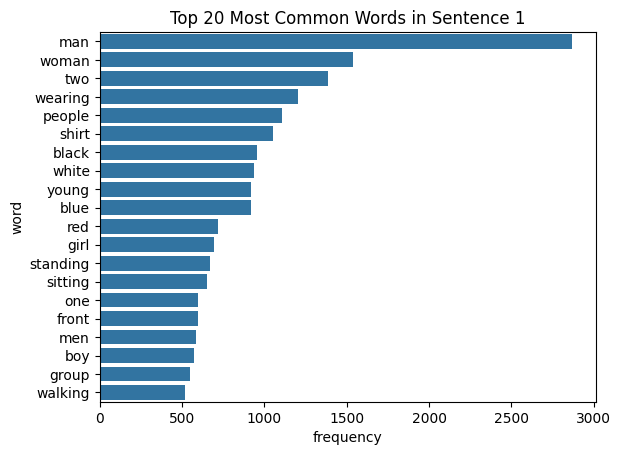

In [376]:
sb.barplot(x='frequency',y='word',data=common_word_sent1)
plt.title('Top 20 Most Common Words in Sentence 1')
plt.show()

In [377]:
word_freq_sent2= Counter()
for text in valid_data['sentence2_token'].apply(word_tokenize):
    word_freq_sent2.update(text)

In [378]:
sentence2_words_valid = ' '.join(valid_data['sentence2_token']).split()

In [379]:
common_word_sent2=word_freq_sent2.most_common(20)

In [380]:
print(common_word_sent2)

[('man', 2081), ('woman', 1074), ('people', 1053), ('two', 853), ('playing', 512), ('men', 508), ('girl', 495), ('boy', 425), ('dog', 396), ('person', 385), ('outside', 359), ('wearing', 346), ('sitting', 333), ('group', 315), ('women', 303), ('young', 287), ('walking', 252), ('child', 242), ('standing', 238), ('children', 201)]


In [381]:
common_word_sent2=pd.DataFrame(word_freq_sent2.most_common(20),columns=['word','frequency'])

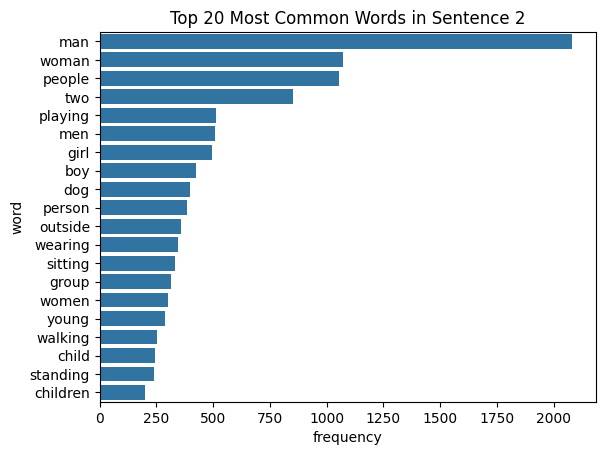

In [382]:
sb.barplot(x='frequency',y='word',data=common_word_sent2)
plt.title('Top 20 Most Common Words in Sentence 2')
plt.show()

### wordcloud

In [383]:
from wordcloud import WordCloud

In [384]:
!pip install wordcloud

In [385]:
font_path = 'C:\Program Files\Microsoft Visual TrueType'

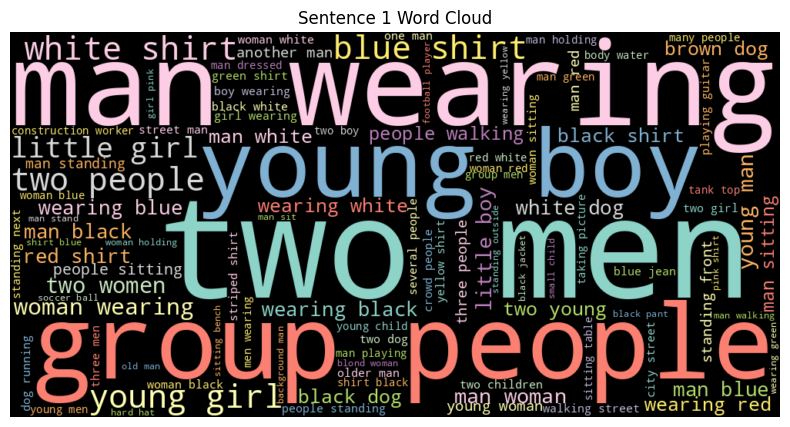

In [386]:
wordcloud1 = WordCloud(width=1000, height=500, max_words=100,colormap='Set3').generate(' '.join(sentence1_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Sentence 1 Word Cloud')
plt.show()

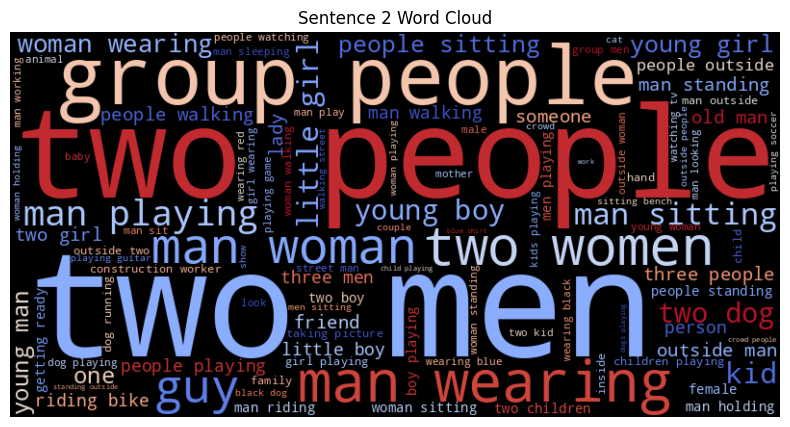

In [387]:
wordcloud2 = WordCloud(width=800, height=400, max_words=100,colormap='coolwarm').generate(' '.join(sentence2_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Sentence 2 Word Cloud')
plt.show()

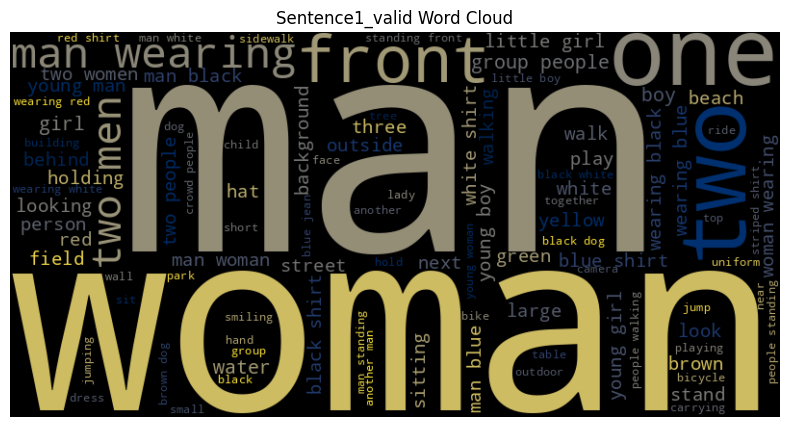

In [388]:
wordcloud1_valid = WordCloud(width=800, height=400, max_words=100,colormap='cividis').generate(' '.join(sentence1_words_valid))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1_valid, interpolation='bilinear')
plt.axis('off')
plt.title('Sentence1_valid Word Cloud')
plt.show()

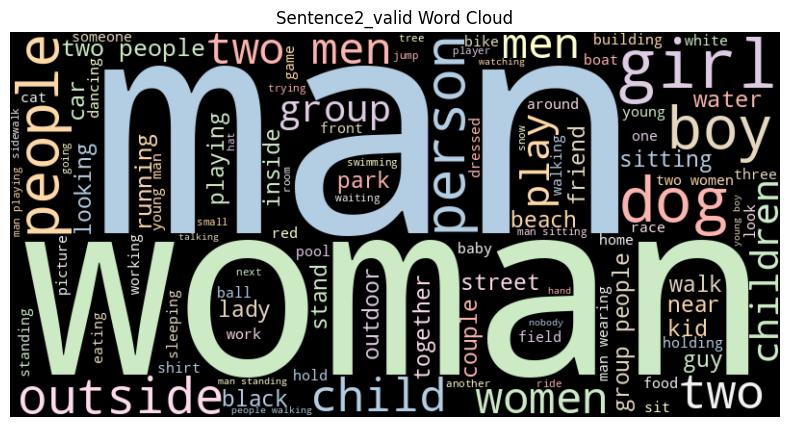

In [389]:
wordcloud2_valid = WordCloud(width=800, height=400, max_words=100,colormap='Pastel1').generate(' '.join(sentence2_words_valid))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2_valid, interpolation='bilinear')
plt.axis('off')
plt.title('Sentence2_valid Word Cloud')
plt.show()

## Tokenization with DistilBertTokenizer

In [390]:
pip install transformers


In [391]:
pip install tf-keras

In [392]:
pip install tensorflow

In [393]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [394]:
from transformers import DistilBertTokenizer,TFDistilBertForSequenceClassification
import tensorflow as tf

In [395]:
pip install huggingface_hub

In [396]:
!git lfs install


Git LFS initialized.


In [397]:


!git config --global user.email "burravijyusha@gmail.com"
!git config --global user.name "Vijyusha Burra"


In [398]:
import transformers

print(transformers.__version__)

4.42.4


In [399]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


In [400]:
train_data.head()

sentence1  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2  A person on a horse jumps over a broken down a...   
3              Children smiling and waving at camera   
4              Children smiling and waving at camera   

                                           sentence2  gold_label_num  \
0  A person is training his horse for a competition.               1   
1      A person is at a diner, ordering an omelette.               2   
2                  A person is outdoors, on a horse.               0   
3                  They are smiling at their parents               1   
4                         There are children present               0   

   sentence1_length  sentence2_length                     sentence1_token  \
0                54                49  person horse jumps broken airplane   
1                54                45  person horse jumps broken airplane   
2                54                33  person horse jumps broken airplane   
3                37                33      children smiling waving camera   
4                37                26      children smiling waving camera   

                     sentence2_token  sentence1_length_token  \
0  person training horse competition                      34   
1     person diner ordering omelette                      34   
2              person outdoors horse                      34   
3                    smiling parents                      30   
4                   children present                      30   

   sentence2_length_token  word_count_sent1  word_count_sent2  
0                      33                 5                 4  
1                      30                 5                 4  
2                      21                 5                 3  
3                      15                 4                 2  
4                      16                 4                 2

In [401]:
train_data.columns

Index(['sentence1', 'sentence2', 'gold_label_num', 'sentence1_length',
       'sentence2_length', 'sentence1_token', 'sentence2_token',
       'sentence1_length_token', 'sentence2_length_token', 'word_count_sent1',
       'word_count_sent2'],
      dtype='object')

In [402]:
columns_dropna=['sentence1_token', 'sentence2_token',
       'sentence1_length_token', 'sentence2_length_token', 'word_count_sent1',
       'word_count_sent2']

In [403]:
train=train_data.drop(columns=columns_dropna)

In [404]:
train


sentence1  \
0       A person on a horse jumps over a broken down a...   
1       A person on a horse jumps over a broken down a...   
2       A person on a horse jumps over a broken down a...   
3                   Children smiling and waving at camera   
4                   Children smiling and waving at camera   
...                                                   ...   
550147                Four dirty and barefooted children.   
550148                Four dirty and barefooted children.   
550149  A man is surfing in a bodysuit in beautiful bl...   
550150  A man is surfing in a bodysuit in beautiful bl...   
550151  A man is surfing in a bodysuit in beautiful bl...   

                                                sentence2  gold_label_num  \
0       A person is training his horse for a competition.               1   
1           A person is at a diner, ordering an omelette.               2   
2                       A person is outdoors, on a horse.               0   
3                       They are smiling at their parents               1   
4                              There are children present               0   
...                                                   ...             ...   
550147           four kids won awards for 'cleanest feet'               2   
550148  four homeless children had their shoes stolen,...               1   
550149  A man in a bodysuit is competing in a surfing ...               1   
550150  A man in a business suit is heading to a board...               2   
550151  On the beautiful blue water there is a man in ...               0   

        sentence1_length  sentence2_length  
0                     54                49  
1                     54                45  
2                     54                33  
3                     37                33  
4                     37                26  
...                  ...               ...  
550147                35                40  
550148                35                71  
550149                55                58  
550150                55                55  
550151                55                65  

[548820 rows x 5 columns]

In [405]:
valid_data.head()

sentence1  \
0  Two women are embracing while holding to go pa...   
1  Two women are embracing while holding to go pa...   
2  Two women are embracing while holding to go pa...   
3  Two young children in blue jerseys, one with t...   
4  Two young children in blue jerseys, one with t...   

                                           sentence2  gold_label_num  \
0  The sisters are hugging goodbye while holding ...               1   
1                    Two woman are holding packages.               0   
2               The men are fighting outside a deli.               2   
3     Two kids in numbered jerseys wash their hands.               0   
4           Two kids at a ballgame wash their hands.               1   

   sentence1_length  sentence2_length  \
0                53                85   
1                53                31   
2                53                36   
3               161                46   
4               161                40   

                                     sentence1_token  \
0            two women embracing holding go packages   
1            two women embracing holding go packages   
2            two women embracing holding go packages   
3  two young children blue jerseys one number 9 o...   
4  two young children blue jerseys one number 9 o...   

                                     sentence2_token  sentence1_length_token  \
0  sisters hugging goodbye holding go packages ea...                      39   
1                         two woman holding packages                      39   
2                          men fighting outside deli                      39   
3               two kids numbered jerseys wash hands                     107   
4                       two kids ballgame wash hands                     107   

   sentence2_length_token  word_count_sent1  word_count_sent2  
0                      56                 6                 8  
1                      26                 6                 4  
2                      25                 6                 4  
3                      36                18                 6  
4                      28                18                 5

In [406]:
valid=valid_data.drop(columns=columns_dropna)

In [407]:
valid

sentence1  \
0     Two women are embracing while holding to go pa...   
1     Two women are embracing while holding to go pa...   
2     Two women are embracing while holding to go pa...   
3     Two young children in blue jerseys, one with t...   
4     Two young children in blue jerseys, one with t...   
...                                                 ...   
9994  A small girl wearing a pink jacket is riding o...   
9996  A small girl wearing a pink jacket is riding o...   
9997  A young girl with blue and pink ribbons in her...   
9998  A young girl with blue and pink ribbons in her...   
9999  A young girl with blue and pink ribbons in her...   

                                              sentence2  gold_label_num  \
0     The sisters are hugging goodbye while holding ...               1   
1                       Two woman are holding packages.               0   
2                  The men are fighting outside a deli.               2   
3        Two kids in numbered jerseys wash their hands.               0   
4              Two kids at a ballgame wash their hands.               1   
...                                                 ...             ...   
9994                            The carousel is moving.               0   
9996          The girl is moving at the speed of light.               2   
9997                         People in a water fountain               0   
9998                       A young girl knits a sweater               2   
9999  A young mother tries to grab her topless child...               1   

      sentence1_length  sentence2_length  
0                   53                85  
1                   53                31  
2                   53                36  
3                  161                46  
4                  161                40  
...                ...               ...  
9994                59                23  
9996                59                41  
9997               154                26  
9998               154                28  
9999               154                97  

[9842 rows x 5 columns]

In [408]:
df_test

gold_label                                          sentence1  \
0           neutral  This church choir sings to the masses as they ...   
1        entailment  This church choir sings to the masses as they ...   
2     contradiction  This church choir sings to the masses as they ...   
3           neutral  A woman with a green headscarf, blue shirt and...   
4        entailment  A woman with a green headscarf, blue shirt and...   
...             ...                                                ...   
9995  contradiction        Two women are observing something together.   
9996     entailment        Two women are observing something together.   
9997  contradiction  A man in a black leather jacket and a book in ...   
9998     entailment  A man in a black leather jacket and a book in ...   
9999        neutral  A man in a black leather jacket and a book in ...   

                                           sentence2  
0              The church has cracks in the ceiling.  
1                    The church is filled with song.  
2                A choir singing at a baseball game.  
3                                The woman is young.  
4                           The woman is very happy.  
...                                              ...  
9995  Two women are standing with their eyes closed.  
9996             Two girls are looking at something.  
9997                         A man is flying a kite.  
9998               A man is speaking in a classroom.  
9999       A man is teaching science in a classroom.  

[10000 rows x 3 columns]

In [409]:
df_test=df_test.drop(df_test[df_test['gold_label']=='-'].index)

In [410]:
df_test['gold_label_num']=df_test['gold_label'].apply(lambda x:label_mapping[x])

In [411]:
df_test

gold_label                                          sentence1  \
0           neutral  This church choir sings to the masses as they ...   
1        entailment  This church choir sings to the masses as they ...   
2     contradiction  This church choir sings to the masses as they ...   
3           neutral  A woman with a green headscarf, blue shirt and...   
4        entailment  A woman with a green headscarf, blue shirt and...   
...             ...                                                ...   
9995  contradiction        Two women are observing something together.   
9996     entailment        Two women are observing something together.   
9997  contradiction  A man in a black leather jacket and a book in ...   
9998     entailment  A man in a black leather jacket and a book in ...   
9999        neutral  A man in a black leather jacket and a book in ...   

                                           sentence2  gold_label_num  
0              The church has cracks in the ceiling.               1  
1                    The church is filled with song.               0  
2                A choir singing at a baseball game.               2  
3                                The woman is young.               1  
4                           The woman is very happy.               0  
...                                              ...             ...  
9995  Two women are standing with their eyes closed.               2  
9996             Two girls are looking at something.               0  
9997                         A man is flying a kite.               2  
9998               A man is speaking in a classroom.               0  
9999       A man is teaching science in a classroom.               1  

[9824 rows x 4 columns]

In [412]:
df_test.drop(columns='gold_label')

sentence1  \
0     This church choir sings to the masses as they ...   
1     This church choir sings to the masses as they ...   
2     This church choir sings to the masses as they ...   
3     A woman with a green headscarf, blue shirt and...   
4     A woman with a green headscarf, blue shirt and...   
...                                                 ...   
9995        Two women are observing something together.   
9996        Two women are observing something together.   
9997  A man in a black leather jacket and a book in ...   
9998  A man in a black leather jacket and a book in ...   
9999  A man in a black leather jacket and a book in ...   

                                           sentence2  gold_label_num  
0              The church has cracks in the ceiling.               1  
1                    The church is filled with song.               0  
2                A choir singing at a baseball game.               2  
3                                The woman is young.               1  
4                           The woman is very happy.               0  
...                                              ...             ...  
9995  Two women are standing with their eyes closed.               2  
9996             Two girls are looking at something.               0  
9997                         A man is flying a kite.               2  
9998               A man is speaking in a classroom.               0  
9999       A man is teaching science in a classroom.               1  

[9824 rows x 3 columns]

In [413]:
df_test

gold_label                                          sentence1  \
0           neutral  This church choir sings to the masses as they ...   
1        entailment  This church choir sings to the masses as they ...   
2     contradiction  This church choir sings to the masses as they ...   
3           neutral  A woman with a green headscarf, blue shirt and...   
4        entailment  A woman with a green headscarf, blue shirt and...   
...             ...                                                ...   
9995  contradiction        Two women are observing something together.   
9996     entailment        Two women are observing something together.   
9997  contradiction  A man in a black leather jacket and a book in ...   
9998     entailment  A man in a black leather jacket and a book in ...   
9999        neutral  A man in a black leather jacket and a book in ...   

                                           sentence2  gold_label_num  
0              The church has cracks in the ceiling.               1  
1                    The church is filled with song.               0  
2                A choir singing at a baseball game.               2  
3                                The woman is young.               1  
4                           The woman is very happy.               0  
...                                              ...             ...  
9995  Two women are standing with their eyes closed.               2  
9996             Two girls are looking at something.               0  
9997                         A man is flying a kite.               2  
9998               A man is speaking in a classroom.               0  
9999       A man is teaching science in a classroom.               1  

[9824 rows x 4 columns]

In [414]:
max_lengths=[64,128,256,512]

In [415]:
for max_length in max_lengths:
    trunc_sent1=(train['sentence1_length']>max_length).mean()*100
    trunc_sent2=(train['sentence2_length']>max_length).mean()*100
    print(f'max length{max_length}:{trunc_sent1:.2f}% of sentence1 and {trunc_sent2:.2f}% of sentence2 are turncated')


max length64:42.51% of sentence1 and 6.17% of sentence2 are turncated
max length128:3.65% of sentence1 and 0.08% of sentence2 are turncated
max length256:0.05% of sentence1 and 0.00% of sentence2 are turncated
max length512:0.00% of sentence1 and 0.00% of sentence2 are turncated


In [416]:
sample_fraction = 0.01  # Use 1% of the data for training and validation
train= train.sample(frac=sample_fraction, random_state=42)
valid = valid.sample(frac=sample_fraction, random_state=42)

In [417]:
def tokenize_sentence(sentence1,sentence2,tokenizer,max_length=256):
    inputs=tokenizer(sentence1.tolist(),
                     sentence2.tolist(),
                     max_length=max_length,
                     padding='max_length',
                     truncation=True,
                     return_tensors='tf')
    return inputs

In [418]:
#encoding the datasets
train_inputs=tokenize_sentence(train['sentence1'],train['sentence2'],tokenizer)

In [419]:
valid_inputs=tokenize_sentence(valid['sentence1'],valid['sentence2'],tokenizer)

In [420]:
test_inputs=tokenize_sentence(df_test['sentence1'],df_test['sentence2'],tokenizer)

In [421]:
train_input_ids=train_inputs['input_ids']

In [422]:
train_attention_mask=train_inputs['attention_mask']

In [423]:
valid_input_ids=valid_inputs['input_ids']

In [424]:

valid_attention_mask=valid_inputs['attention_mask']

In [425]:

test_attention_mask=test_inputs['attention_mask']

In [426]:
test_attention_mask=test_inputs['attention_mask']

In [427]:
#converting labels into tensors
train_label_tensors=tf.convert_to_tensor(train['gold_label_num'].tolist(),dtype=tf.int32)

In [428]:
valid_label_tensors=tf.convert_to_tensor(valid['gold_label_num'].tolist(),dtype=tf.int32)

In [429]:
test_label_tensors=tf.convert_to_tensor(df_test['gold_label_num'].tolist(),dtype=tf.int32)

In [430]:
#creating tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': train_inputs['input_ids'],
    'attention_mask': train_inputs['attention_mask']
}, train_label_tensors))

In [431]:
valid_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': valid_inputs['input_ids'],
    'attention_mask': valid_inputs['attention_mask']
}, valid_label_tensors))

In [432]:
test_dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': test_inputs['input_ids'],
    'attention_mask': test_inputs['attention_mask']
}, test_label_tensors))

In [433]:
batch_size=16

In [434]:
train_dataset = train_dataset.shuffle(buffer_size=len(train)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset = valid_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [435]:
train_dataset


<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 256), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 256), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [436]:
for sample in train_dataset.take(1):
    print(sample)

({'input_ids': <tf.Tensor: shape=(16, 256), dtype=int32, numpy=
array([[  101,  2028,  2374, ...,     0,     0,     0],
       [  101,  3899,  2007, ...,     0,     0,     0],
       [  101,  2048,  3080, ...,     0,     0,     0],
       ...,
       [  101,  1037,  2158, ...,     0,     0,     0],
       [  101,  1037, 10789, ...,     0,     0,     0],
       [  101,  1037,  8033, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(16, 256), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}, <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1], dtype=int32)>)


In [437]:
from transformers import TFDistilBertForSequenceClassification,DistilBertTokenizer

In [438]:
from transformers import BertTokenizer,AutoTokenizer, TFAutoModel,BertForSequenceClassification, TFBertModel

In [439]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy()


print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [440]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [441]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_length,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [442]:
from transformers import glue_convert_examples_to_features

In [443]:
from tensorflow.keras.mixed_precision import Policy
policy = Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)


In [444]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [445]:
with strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

    optimizer= 'adam'
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [446]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Can also use 'val_accuracy'
    patience=3,                    # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,     # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1                      # Print out when early stopping is triggered
)

In [447]:
epochs = 10
batch_size =16

history = model.fit(
    train_dataset,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=valid_dataset
)


Epoch 1/10
343/343 [==============================] - 187s 426ms/step - loss: 1.1087 - accuracy: 0.3281 - val_loss: 1.1005 - val_accuracy: 0.3272
Epoch 2/10
343/343 [==============================] - 144s 420ms/step - loss: 1.1002 - accuracy: 0.3273 - val_loss: 1.0993 - val_accuracy: 0.3290
Epoch 3/10
343/343 [==============================] - 144s 421ms/step - loss: 1.0997 - accuracy: 0.3287 - val_loss: 1.0981 - val_accuracy: 0.3283
Epoch 4/10
343/343 [==============================] - 144s 420ms/step - loss: 1.0998 - accuracy: 0.3298 - val_loss: 1.0963 - val_accuracy: 0.3305
Epoch 5/10
343/343 [==============================] - 144s 420ms/step - loss: 1.0991 - accuracy: 0.3301 - val_loss: 1.0992 - val_accuracy: 0.3309
Epoch 6/10
343/343 [==============================] - 144s 421ms/step - loss: 1.0991 - accuracy: 0.3323 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/10
343/343 [==============================] - 144s 420ms/step - loss: 1.0994 - accuracy: 0.3330 - val_loss: 1.0983 -

In [448]:
import numpy as np

In [449]:
history_dict = history.history


In [450]:
print("Validation accuracy: {}".format(np.mean(history_dict['val_accuracy'])))
print("Validation loss: {}".format(np.mean(history_dict['val_loss'])))
print("Accuracy: {}".format(np.mean(history_dict['accuracy'])))
print("Loss: {}".format(np.mean(history_dict['loss'])))

Validation accuracy: 0.33126901686191557
Validation loss: 1.099104142189026
Accuracy: 0.33092697858810427
Loss: 1.1002850770950316


In [451]:
results = model.evaluate(test_dataset)
print(f"Test loss: {results[0]}")
print(f"Test accuracy: {results[1]}")

614/614 [==============================] - 90s 146ms/step - loss: 1.0990 - accuracy: 0.3340
Test loss: 1.0989999771118164
Test accuracy: 0.33398085832595825
